In [2]:
import os    
import pandas as pd
import matplotlib.pyplot as plt

## Each city

In [3]:
labels=["full_standard_english", "not-syntactic_standard_english", "non_standard_english", "code-switched", "some_english", "not_english"]
new_labels =['Syntactic English', 'Non syntactic English', 'English with informal terms', 'Code-switched', 'Incidental English', 'Non English']
dist = ["0.7_to_0.8_english_words", "0.8_to_0.9_english_words", "0.9_to_1.0_english_words"]

def interval_distribution(city, interval):
    path = f"./{city}/{interval}"
    files = os.listdir(path)
    df = pd.read_csv(f"{path}/{files[0]}")
    for i in range(1,len(files)):
        fpath = f"{path}/{files[i]}"
        df_temp = pd.read_csv(fpath)
        df = df.append(df_temp)
    
    df['new_label'] = df['label'].map(dict(zip(labels, new_labels)))
    value_counts = df["new_label"].value_counts()
    return value_counts

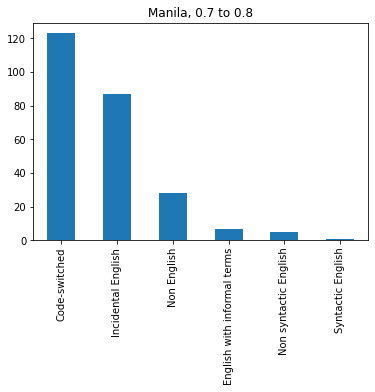

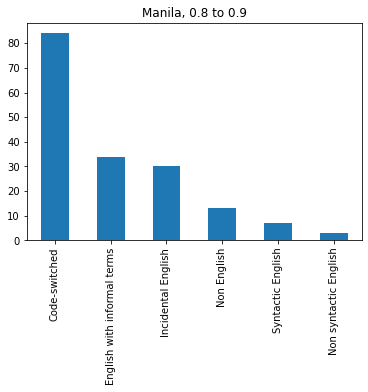

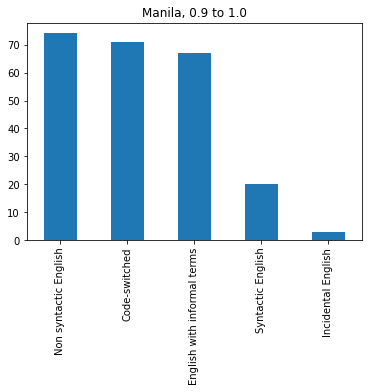

In [4]:
s = interval_distribution("Manila", "0.7_to_0.8_english_words")
plot = s.plot.bar()
plot.set_title("Manila, 0.7 to 0.8")
plt.show()

s = interval_distribution("Manila", "0.8_to_0.9_english_words")
plot = s.plot.bar()
plot.set_title("Manila, 0.8 to 0.9")
plt.show()

s = interval_distribution("Manila", "0.9_to_1.0_english_words")
plot = s.plot.bar()
plot.set_title("Manila, 0.9 to 1.0")
plt.show()

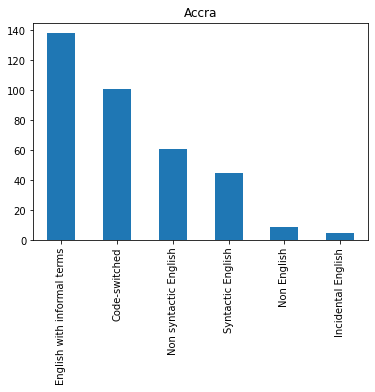

In [7]:
s = interval_distribution("Accra", "0.7_to_0.8_english_words")
plot = s.plot.bar()
plot.set_title("Accra")
plt.show()

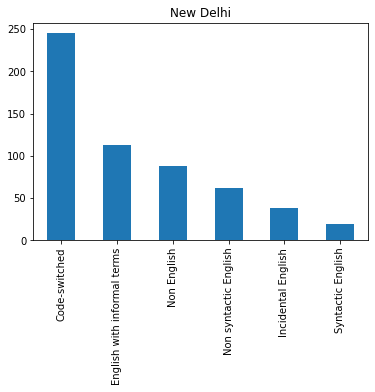

In [8]:
s = interval_distribution("New Delhi", "0.7_to_0.8_english_words")
plot = s.plot.bar()
plot.set_title("New Delhi")
plt.show()

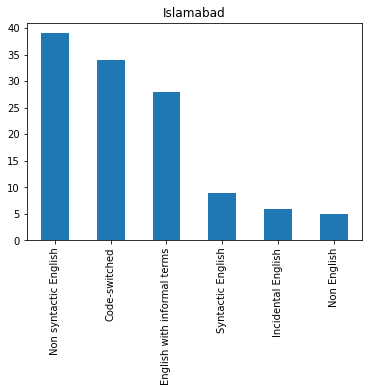

In [9]:
s = interval_distribution("Islamabad", "0.7_to_0.8_english_words")
plot = s.plot.bar()
plot.set_title("Islamabad")
plt.show()

## All

Code-switched                  503
English with informal terms    286
Non syntactic English          167
Incidental English             136
Non English                    130
Syntactic English               74
Name: new_label, dtype: int64


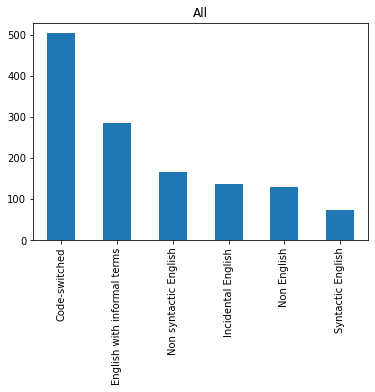

In [11]:
all_cities = ['Manila', 'New Delhi', 'Islamabad', 'Accra']
df = pd.DataFrame()
for city in all_cities:
    path = f"./{city}/0.7_to_0.8_english_words"
    files = os.listdir(path)
    for i in range(0,len(files)):
        fpath = f"{path}/{files[i]}"
        df_temp = pd.read_csv(fpath)
        df_temp["city"] = city
        df = df.append(df_temp)

df['new_label'] = df['label'].map(dict(zip(labels, new_labels)))
value_counts = df["new_label"].value_counts()
print(value_counts)

plot = value_counts.plot.bar()
plot.set_title("All")
plt.show()

In [13]:
result = df.groupby(['new_label','city'])['city'].aggregate('count')
print(result)

new_label                    city     
Code-switched                Accra        101
                             Islamabad     34
                             Manila       123
                             New Delhi    245
English with informal terms  Accra        138
                             Islamabad     28
                             Manila         7
                             New Delhi    113
Incidental English           Accra          5
                             Islamabad      6
                             Manila        87
                             New Delhi     38
Non English                  Accra          9
                             Islamabad      5
                             Manila        28
                             New Delhi     88
Non syntactic English        Accra         61
                             Islamabad     39
                             Manila         5
                             New Delhi     62
Syntactic English            Accra       

Text(0.5, 1.0, 'All')

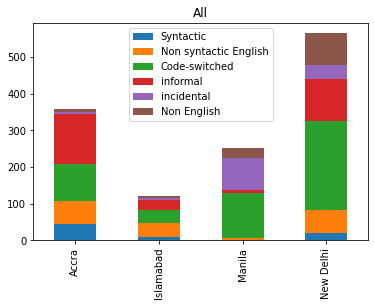

In [14]:
syntactic = [45, 9, 1, 19]
non_syntactic = [61, 39, 5, 62]
informal = [138, 28, 7, 113]
code_switch = [101, 34, 123, 245]
incidental = [5, 6, 87, 38]
non_english = [9, 5, 28, 88]
all_df = pd.DataFrame({'Syntactic': syntactic, 'Non syntactic English': non_syntactic, "Code-switched": code_switch, "informal": informal ,"incidental": incidental, "Non English": non_english}, index=["Accra", "Islamabad", "Manila", "New Delhi"])
ax = all_df.plot.bar(stacked=True)
ax.set_title("All")